In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import pandas as pd

### Visualize Dataset

In [10]:
# get list of file name
images = os.listdir(os.path.join(os.getcwd(), 'images'))
images[:9]

['1595.jpg',
 '193.jpg',
 '1566.jpg',
 '550.jpg',
 '942.jpg',
 '1722.jpg',
 '1283.jpg',
 '584.jpg',
 '499.jpg']

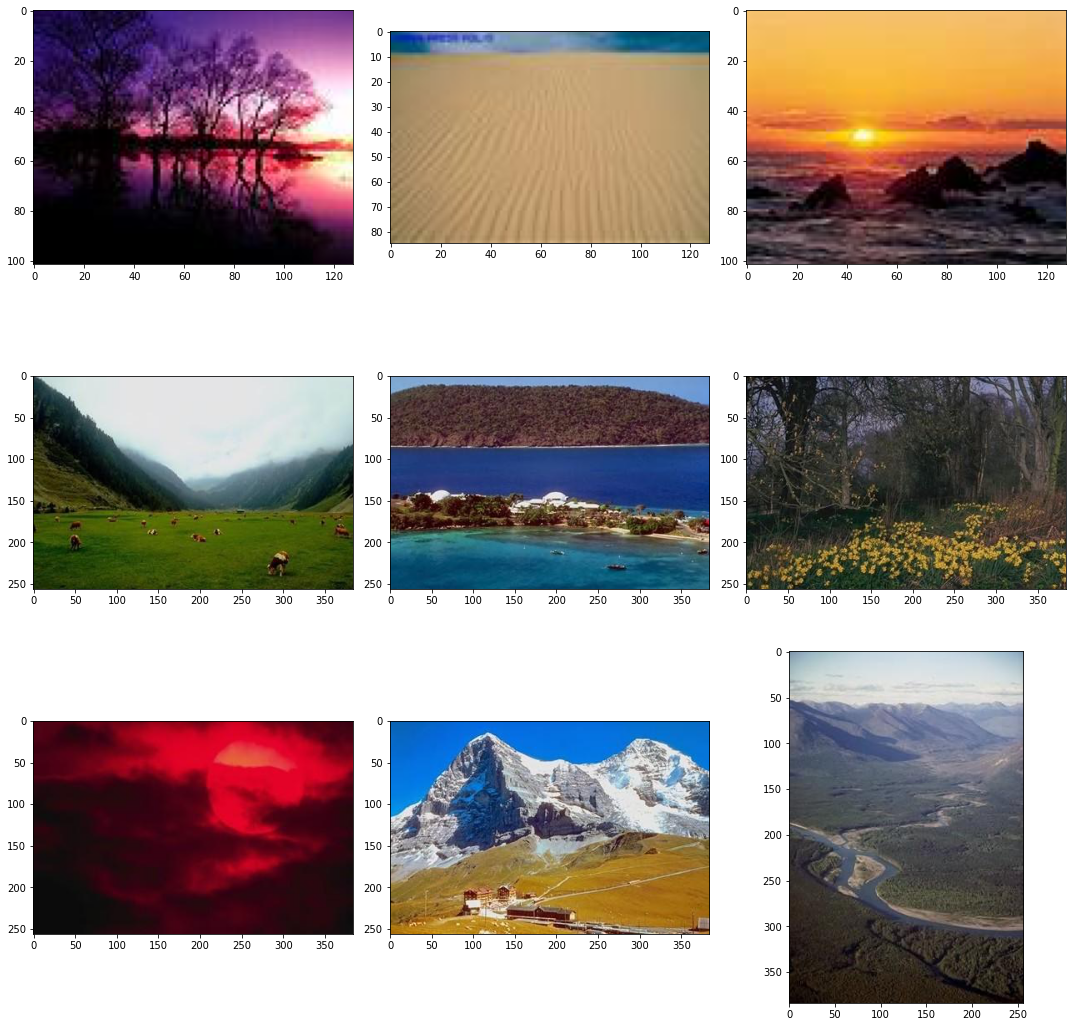

In [16]:
# plot sample images
fig = plt.figure(figsize=(15,15))
for i,image in enumerate(images[:9]):
    # read image
    image = imread('images/'+image)
    # subplot 
    fig.add_subplot(3,3,i+1)
    plt.imshow(image)
fig.tight_layout()
plt.show()

### Create mappings

In [2]:
# load mapping csv file

mapping_df = pd.read_csv('miml_labels_2.csv',  index_col='Filenames')
mapping_df.head()

,labels
Filenames,
1.jpg,desert
2.jpg,desert
3.jpg,desert
4.jpg,"desert,mountains"
5.jpg,desert


In [3]:
# find all labels
labels = set()
for i in range(len(mapping_df)):
    tags = mapping_df['labels'][i].split(',')
    # update labels with this tags
    labels.update(tags)

labels

{'desert', 'mountains', 'sea', 'sunset', 'trees'}

In [4]:
# convert set of labels to list
labels = list(labels)
labels.sort()
labels

['desert', 'mountains', 'sea', 'sunset', 'trees']

In [5]:
# create labels to integers mapping
labels_map = {labels[i]:i for i in range(len(labels))}

# create reverse integers to labels mapping
inv_labels_map = {i:labels[i] for i in range(len(labels))}

In [6]:
labels_map

{'desert': 0, 'mountains': 1, 'sea': 2, 'sunset': 3, 'trees': 4}

In [7]:
inv_labels_map

{0: 'desert', 1: 'mountains', 2: 'sea', 3: 'sunset', 4: 'trees'}

In [8]:
# save the labels_mp and inv_labels_map for use later in other files
import json

json.dump(labels_map, open('labels_map.json','w'))
json.dump(inv_labels_map, open('inv_labels_map.json','w'))

In [46]:
# create filename:tags mapping
mapping = mapping_df.to_dict()['labels']
mapping

{'1.jpg': 'desert',
 '2.jpg': 'desert',
 '3.jpg': 'desert',
 '4.jpg': 'desert,mountains',
 '5.jpg': 'desert',
 '6.jpg': 'desert',
 '7.jpg': 'desert,mountains',
 '8.jpg': 'desert',
 '9.jpg': 'desert',
 '10.jpg': 'desert,mountains',
 '11.jpg': 'desert',
 '12.jpg': 'desert',
 '13.jpg': 'desert',
 '14.jpg': 'desert',
 '15.jpg': 'desert',
 '16.jpg': 'desert',
 '17.jpg': 'desert',
 '18.jpg': 'desert',
 '19.jpg': 'desert',
 '20.jpg': 'desert',
 '21.jpg': 'desert,trees',
 '22.jpg': 'desert',
 '23.jpg': 'desert',
 '24.jpg': 'desert,trees',
 '25.jpg': 'desert',
 '26.jpg': 'desert',
 '27.jpg': 'desert',
 '28.jpg': 'desert,trees',
 '29.jpg': 'desert',
 '30.jpg': 'desert',
 '31.jpg': 'desert',
 '32.jpg': 'desert,trees',
 '33.jpg': 'desert',
 '34.jpg': 'desert',
 '35.jpg': 'desert,sunset',
 '36.jpg': 'desert',
 '37.jpg': 'desert',
 '38.jpg': 'desert,trees',
 '39.jpg': 'desert',
 '40.jpg': 'desert',
 '41.jpg': 'desert',
 '42.jpg': 'desert',
 '43.jpg': 'desert',
 '44.jpg': 'desert',
 '45.jpg': 'desert

### Create in-memory dataset

In [99]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [92]:
imgs = list()
targets = list()

for image in images:
    # load image as numpy array
    img = load_img('images/'+image, target_size=(128,128))
    # convert to numpy array
    img = img_to_array(img, dtype='uint8')
    
    # append loaded image to image list
    imgs.append(img)
    
    # get tags
    tags = mapping[image]
    # create empty numpy array
    encoding = np.zeros(len(labels_map), dtype='uint8')
    # mark 1 for matched tags
    for tag in tags.split(','):
        encoding[labels_map[tag]]=1
    
    # append targets with encoding array
    targets.append(encoding)

Number of images :  2000
Number of targets :  2000
================Example================
file name :  1595.jpg
tags :  sunset,trees


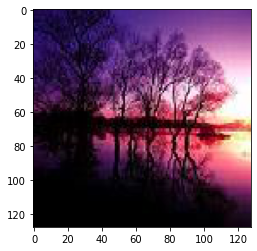


==========In-memory dataset==========

image array shape :  (128, 128, 3)

target array : 

['desert', 'mountains', 'sea', 'sunset', 'trees']  :  [0 0 0 1 1]


In [107]:
# check in-memory dataset
print('Number of images : ', len(imgs))
print('Number of targets : ', len(targets))
print('================Example================')
print('file name : ', images[0])
print('tags : ', mapping[images[0]])
plt.imshow(imgs[0])
plt.show()
print('\n==========In-memory dataset==========')
print('\nimage array shape : ', imgs[0].shape)
print('\ntarget array : \n')
print(labels, ' : ', targets[0])

In [108]:
# create X and y
X = np.array(imgs, dtype='uint8')
y = np.array(targets, dtype='uint8')

In [109]:
# save X and y into .npy
np.savez_compressed('nature_data.npz', X, y)

In [113]:
# load data
data = np.load('nature_data.npz')
X, y = data['arr_0'], data['arr_1']
print('X shape : ', X.shape)
print('y shape : ', y.shape)

X shape :  (2000, 128, 128, 3)
y shape :  (2000, 5)
